In [ ]:
# Источник и описание полей датасета: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
# Импортируем нужные библиотеки
import pandas as pd
import requests,zipfile,io #работает с архивами
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

In [ ]:
# Указываем ссылку на архив с датасетом и создаем соотвествующий объект
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [ ]:
# Просматриваем архив и выбираем нужный файл
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [ ]:
# Считываем датасет
df = pd.read_csv(z.open('bank-full.csv'), sep = ';')
df.sample(n = 10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28749,42,services,married,primary,no,473,yes,no,cellular,30,jan,54,1,-1,0,unknown,no
16475,44,services,married,secondary,no,-18,no,yes,cellular,23,jul,510,2,-1,0,unknown,no
35394,41,technician,married,secondary,no,77,yes,no,cellular,7,may,56,1,-1,0,unknown,no
20830,35,technician,divorced,secondary,no,3549,yes,no,cellular,13,aug,250,4,-1,0,unknown,no
26970,42,self-employed,married,secondary,no,2812,yes,no,cellular,21,nov,46,4,171,1,failure,no
27928,46,management,single,tertiary,no,625,no,no,cellular,28,jan,107,1,163,5,other,no
30440,54,technician,married,secondary,no,0,no,no,telephone,5,feb,744,3,-1,0,unknown,yes
37938,31,blue-collar,married,secondary,no,150,yes,no,telephone,14,may,68,2,-1,0,unknown,no
1683,40,housemaid,divorced,secondary,no,108,no,no,unknown,9,may,93,1,-1,0,unknown,no
18816,57,retired,single,unknown,no,411,no,yes,cellular,31,jul,45,29,-1,0,unknown,no


# Библиотека Matplotlib

In [ ]:
# Выбор стиля оформления диаграмм
plt.style.use('fivethirtyeight')

In [ ]:
# Меняем тип переменной
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


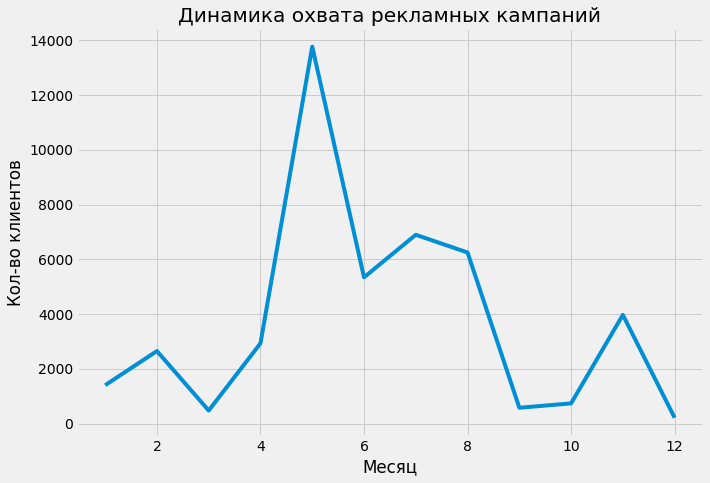

In [ ]:
# Создаем линейный график

plt.figure(figsize = (10,7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

In [ ]:
# Фильтруем и готовим данные по семеному положению
data1 = df.query('marital == "single"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data2 = df.query('marital == "married"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data1.head()

,month,count
0,1,537
1,2,926
2,3,183
3,4,918
4,5,4213


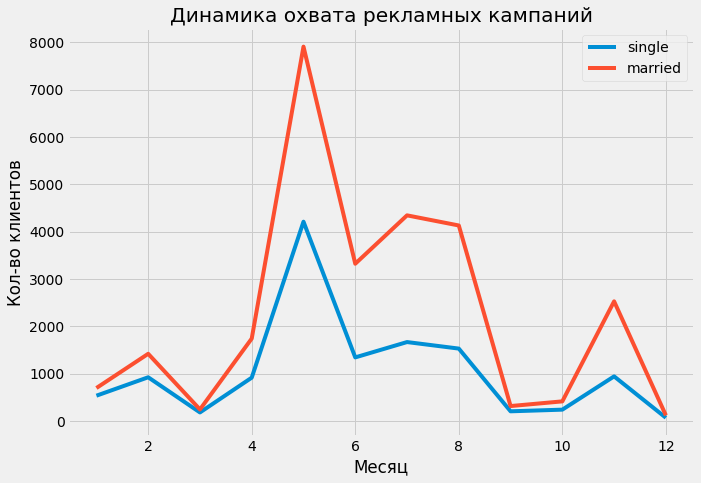

In [ ]:
# Строим линейный график с отфильтрованными данными

plt.figure(figsize = (10,7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single','married'])

plt.show()

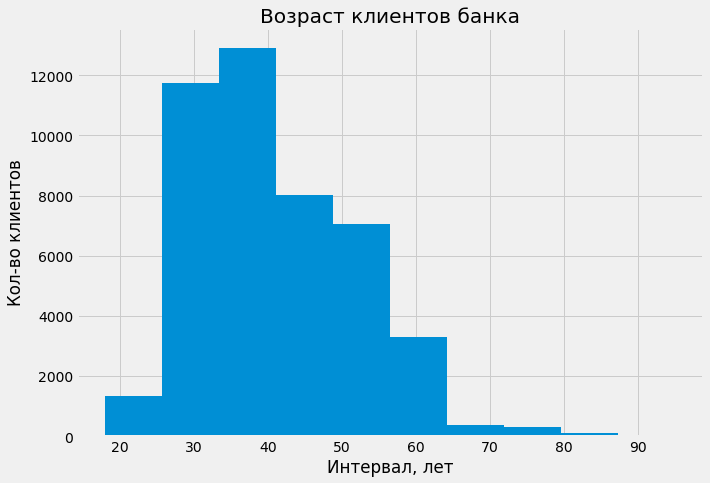

In [ ]:
# Строим гистограмму в разрезе возраста

plt.figure(figsize = (10,7))

plt.hist(df['age'], bins = 10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

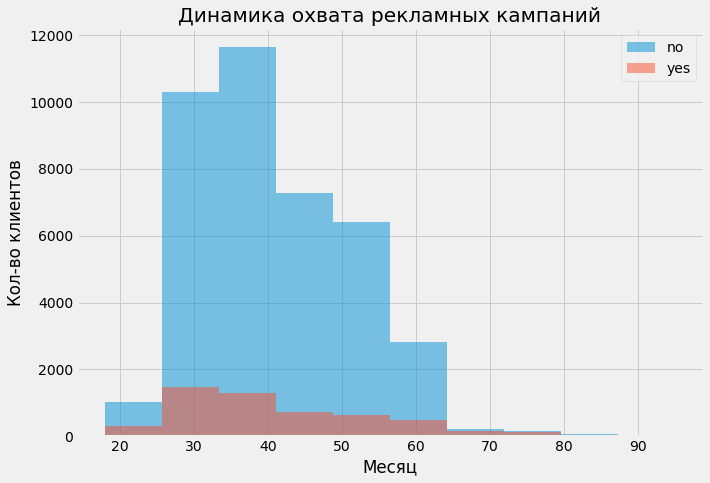

In [ ]:
# Строим гистограмму в разрезе людей, ставших и не ставших клиентами депозита

plt.figure(figsize = (10,7))

plt.hist(df['age'].loc[df['y'] == 'no'], alpha = 0.5, label = 'no')
plt.hist(df['age'].loc[df['y'] == 'yes'], alpha = 0.5, label = 'yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

In [ ]:
# Перекодируем переменную y
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.query('age <  30').groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


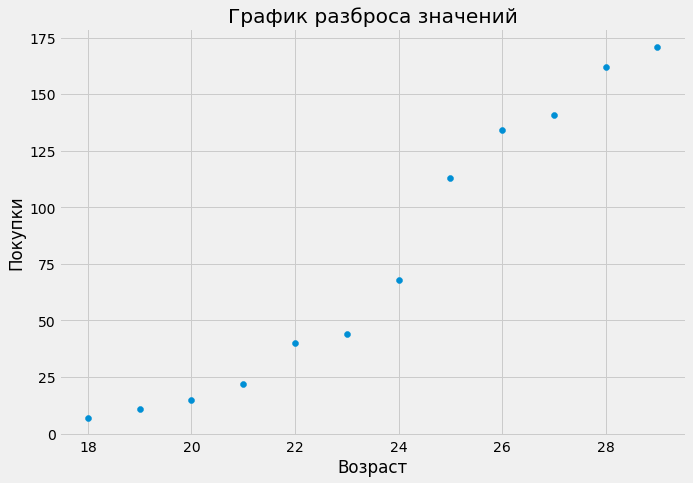

In [ ]:
# Строим диаграмму рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

plt.show()

In [ ]:
# Готовим данные для графика
data1 = df['duration'].loc[df['y']=='yes']
data2 = df['duration'].loc[df['y']=='no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


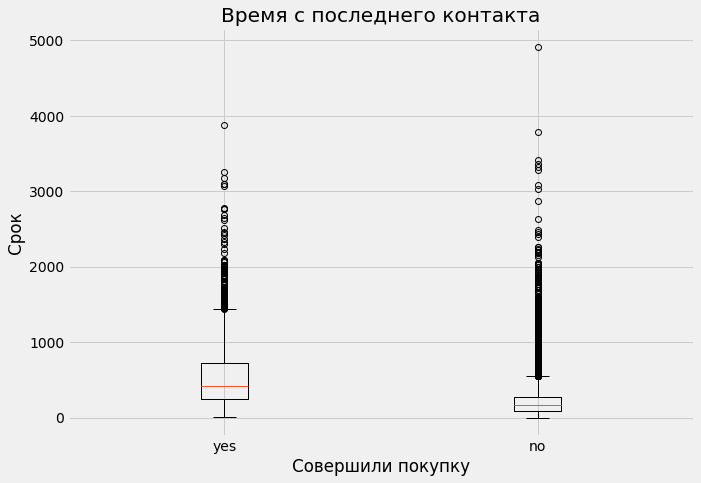

In [ ]:
# Строим боксплот

plt.figure(figsize = (10,7))

plt.boxplot([data1, data2])

plt.title('Время с последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Срок')
plt.xticks([1, 2],['yes', 'no'])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


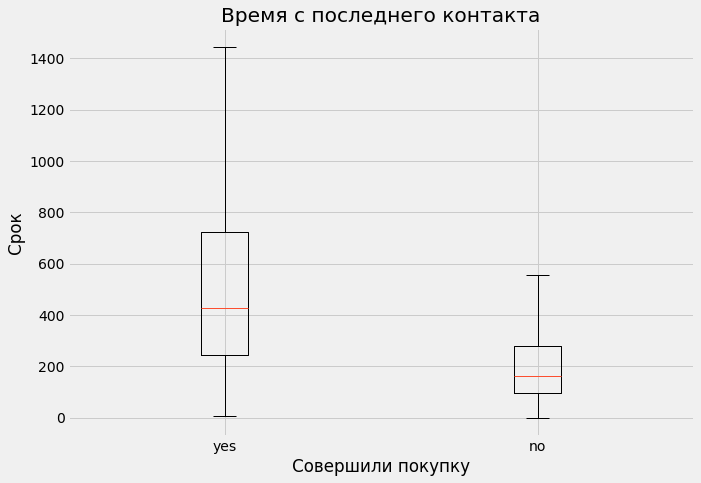

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize = (10,7))

plt.boxplot([data1, data2], showfliers = False)

plt.title('Время с последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Срок')
plt.xticks([1, 2],['yes', 'no'])

plt.show()

In [ ]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


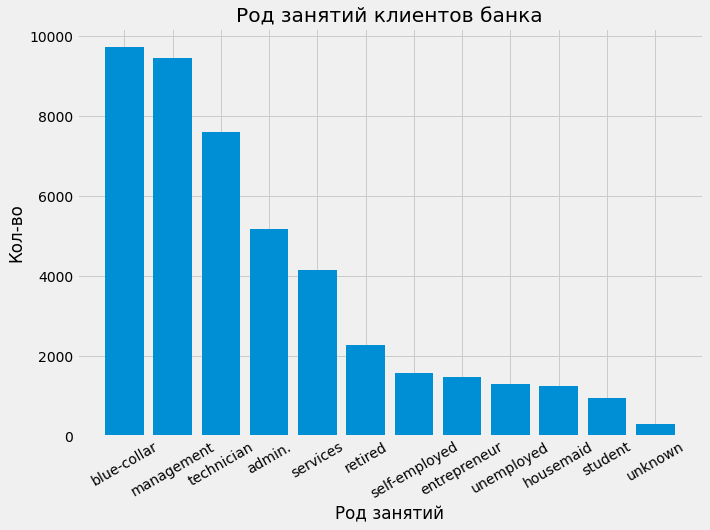

In [ ]:
# Строим столбчатую диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['index'],data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'],df['y']).reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


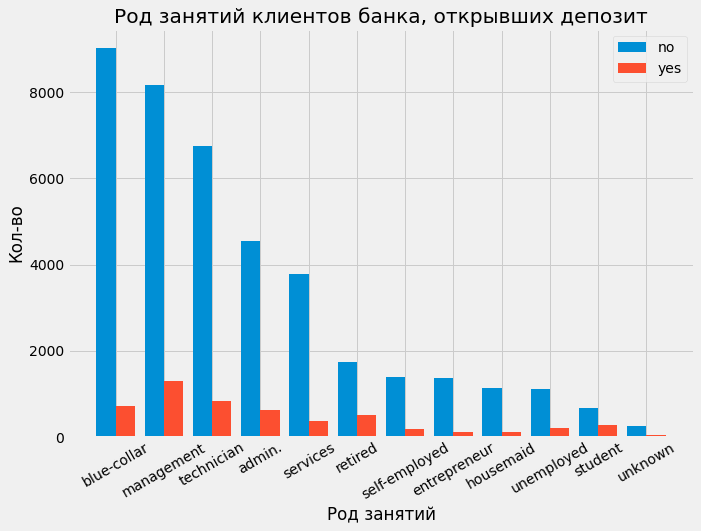

In [ ]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize = (10,7))

# определяем кол-во делений
import numpy as np
n_ticks = np.arange(len(data['no']))
# определяем сдвиг
offset = 0.2
# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no','yes'])
plt.xticks(n_ticks, data['job'], rotation = 30) #добавляем метки делений

plt.show()

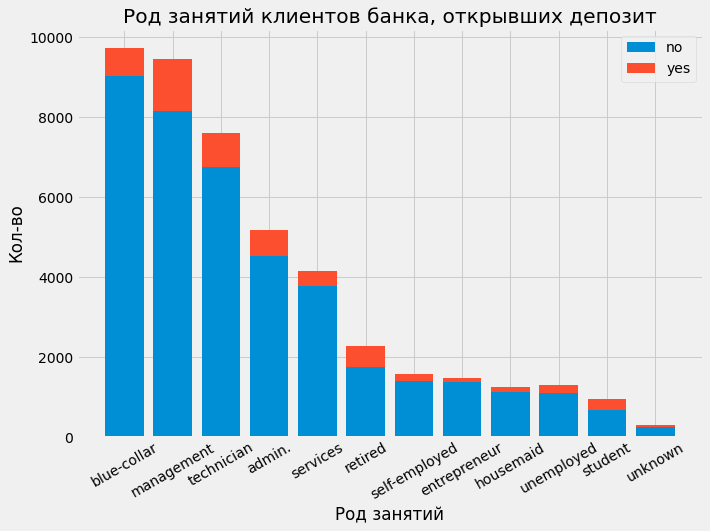

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'],df['y'], normalize = 'index').reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


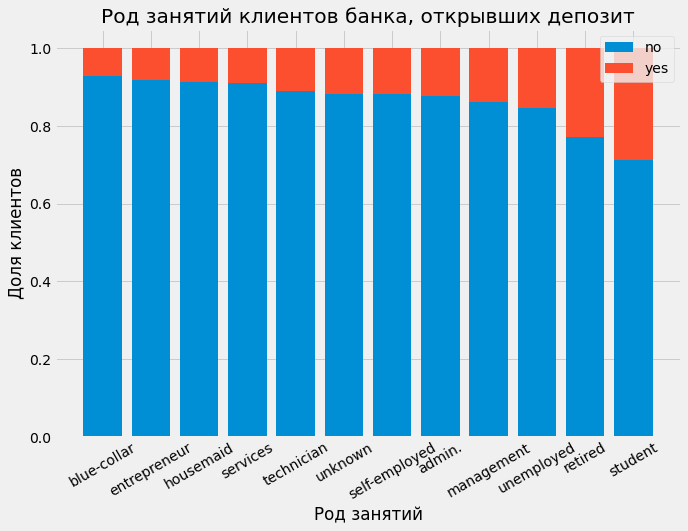

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

plt.show()

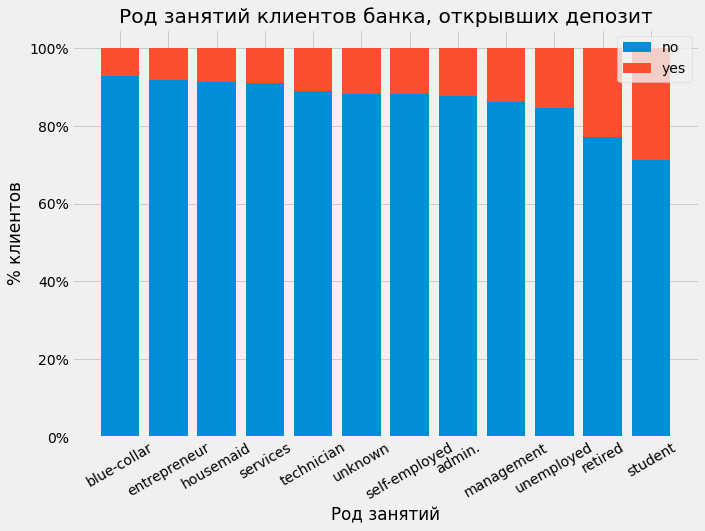

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму c %-тами

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('% клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1));

plt.show()

In [ ]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39922
yes     5289
Name: y, dtype: int64

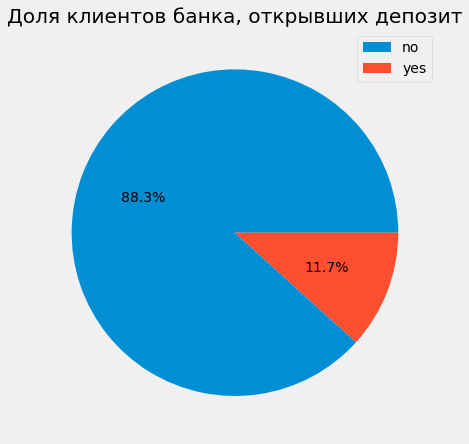

In [ ]:
# Строим круговую диаграмму

plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

# Библиотека Seaborn

In [ ]:
# Считываем датасет
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# Строим корреляциогнную матрицу
correlation = df.corr()
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


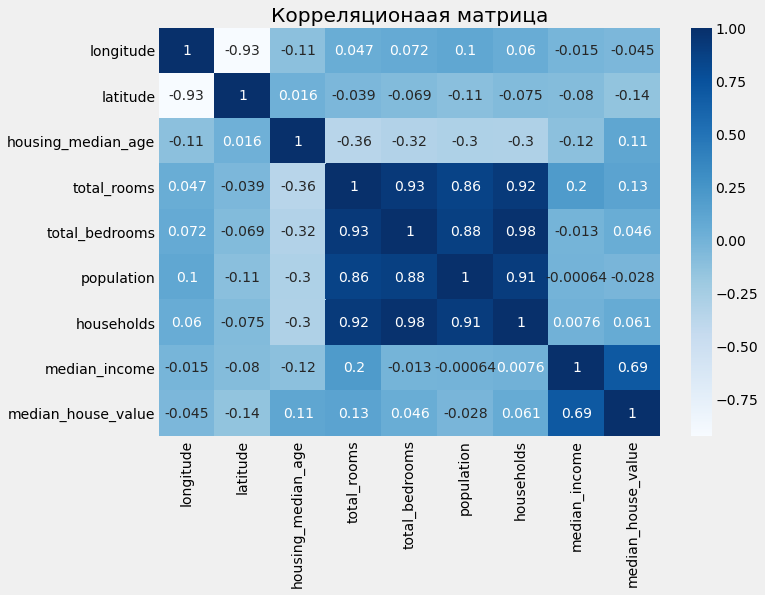

In [ ]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

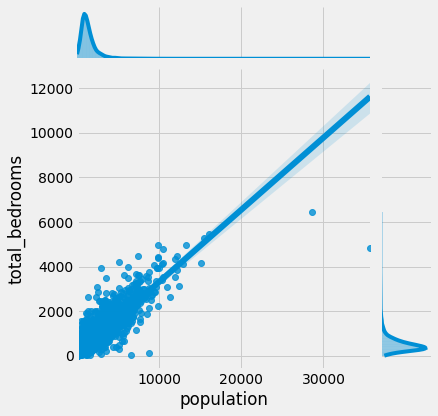

In [ ]:
# Построим совместное распределение по двум переменным
sns.jointplot(x=df['population'], y=df['total_bedrooms'], data=df, kind='reg')

In [ ]:
# Готовим данные
data = df[['median_house_value','population','households', 'total_bedrooms']]
data.head()

,median_house_value,population,households,total_bedrooms
0,66900.0,1015.0,472.0,1283.0
1,80100.0,1129.0,463.0,1901.0
2,85700.0,333.0,117.0,174.0
3,73400.0,515.0,226.0,337.0
4,65500.0,624.0,262.0,326.0


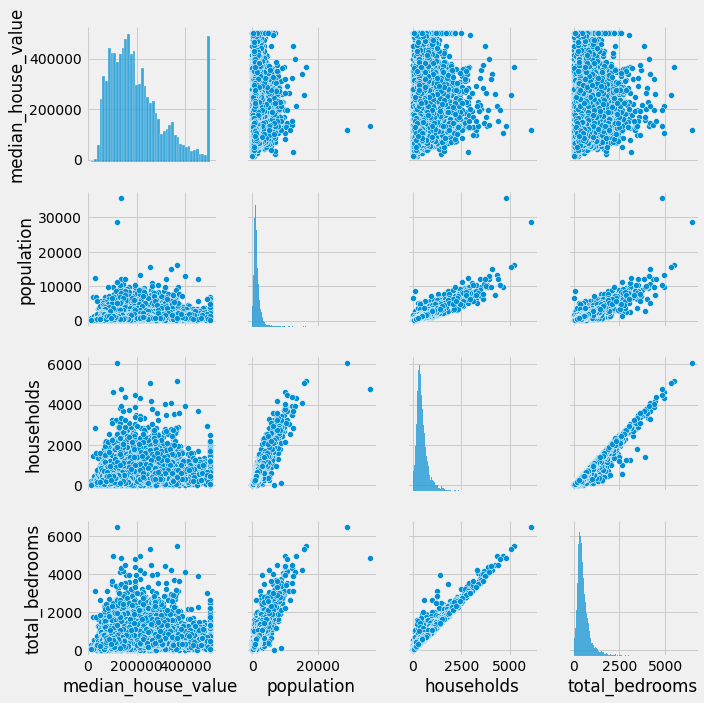

In [ ]:
# Строим попарные отношения переменных
sns.pairplot(data)

In [ ]:
# Готовим данные
df['higher 150000'] = df['median_house_value'] > 150000
data = df[['higher 150000', 'median_income', 'population', 'total_rooms']]
data.head()

,higher 150000,median_income,population,total_rooms
0,False,1.4936,1015.0,5612.0
1,False,1.8200,1129.0,7650.0
2,False,1.6509,333.0,720.0
3,False,3.1917,515.0,1501.0
4,False,1.9250,624.0,1454.0


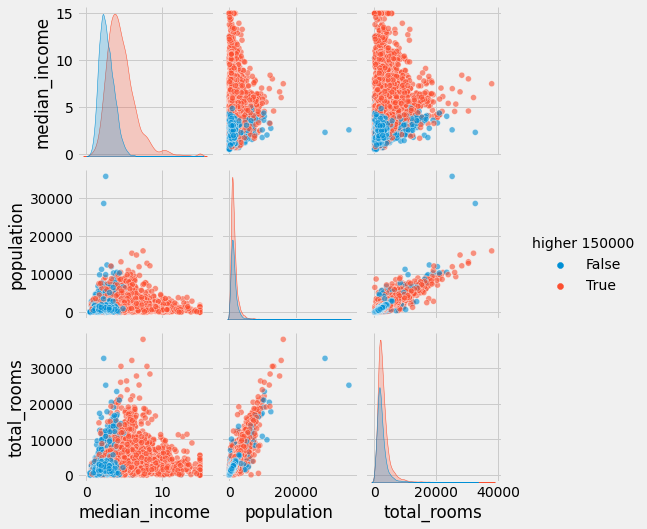

In [ ]:
sns.pairplot(data, hue = 'higher 150000', plot_kws = {'alpha': 0.6})